In [45]:
import pandas as pd
import numpy as np
import os, sys

sys.path.insert(0, "../")

from utils_local import plot_utils



In [46]:
betas      = np.linspace(0.001, 1, 1000)
norm_alpha = np.linspace(0.1, 2, 1000)
rho_norm   = np.full((len(betas), len(norm_alpha)), np.nan)


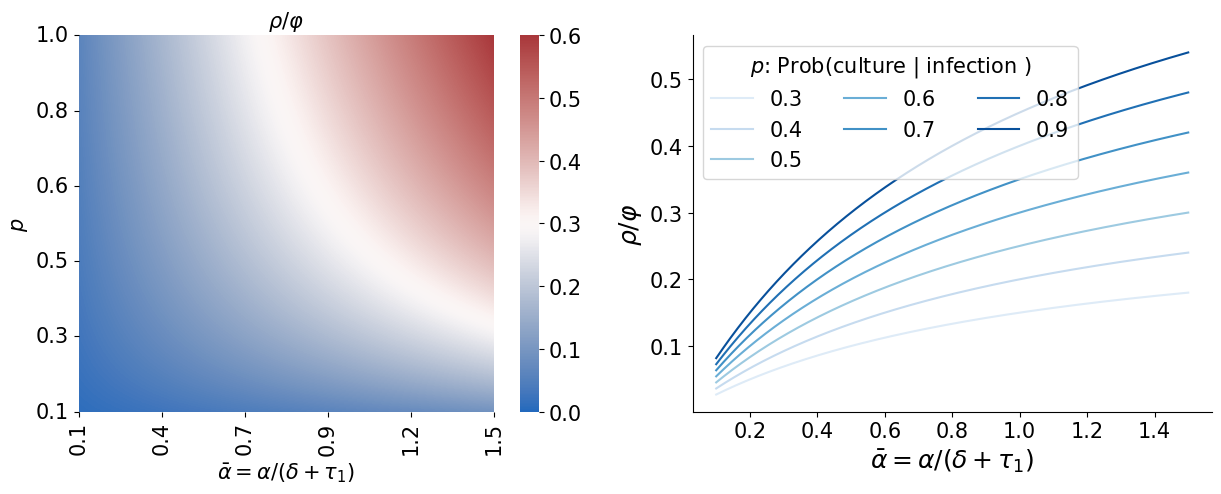

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

p          = np.linspace(0.1, 1, 1000)
alpha_norm = np.linspace(0.1,   1.5, 1000)
rho_norm   = np.full((len(betas), len(norm_alpha)), np.nan)

betass, alphass = np.meshgrid(p, alpha_norm)
ro_bar          = betass  * (alphass) / (alphass+1)

rho_norm_df = pd.DataFrame(ro_bar, index=p, columns=alpha_norm)

fig, ax = plt.subplots(1, 2, figsize=(12.5, 5.2))
ax_hm          = ax[0]

palette = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(ax = ax_hm, data=rho_norm_df.iloc[::-1], cmap=palette,  cbar=True, vmin=0.0, )
ax_hm.set_xlabel(r'$\bar{\alpha}= \alpha/ ( \delta + \tau_1)$', fontsize=15)
ax_hm.set_ylabel(r'$p$', fontsize=15)


xticks = rho_norm_df.columns
keptxticksidx = np.linspace(0,len(xticks),6)
xtickslabels = list(xticks[ np.maximum(keptxticksidx.astype(int)-1,0) ])
xtickslabels = ['{:.1f}'.format(l) for l in xtickslabels]

yticks         = rho_norm_df.iloc[::-1].index
keptyticksidx  = np.linspace(0,len(yticks),6)
ytickslabels   = list(yticks[ np.maximum(keptyticksidx.astype(int)-1,0) ])
ytickslabels   = ['{:.1f}'.format(l) for l in ytickslabels]

ax_hm.set_xticks(keptxticksidx)
ax_hm.set_yticks(keptyticksidx)

ax_hm.set_xticklabels(xtickslabels, fontsize=20, rotation=0)
ax_hm.set_yticklabels(ytickslabels, fontsize=20)

ax_hm.tick_params( which='both', axis='x', labelrotation=90, labelsize=15)
ax_hm.tick_params( which='both', axis='both', labelsize=15)

ax_hm.set_title(r"$\rho/\varphi$", fontsize=15)

Ps = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
colors = sns.color_palette(palette="Blues", n_colors=len(Ps), desat=None, as_cmap=False)
for idx_p, p in enumerate(Ps):

    ro_norm = p  * (alpha_norm) / (alpha_norm+1)

    ax[1].plot(alpha_norm, ro_norm, label=p, color=colors[idx_p])

ax[1].legend(title=r'$p$: Prob(culture | infection )', ncol=3, loc="upper left")
ax[1].set_xlabel(r'$\bar{\alpha}= \alpha/ ( \delta + \tau_1)$')
ax[1].set_ylabel(r"$\rho/\varphi$")

for axi in ax.flatten():
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

plt.tight_layout()

fig.savefig('./EffectiveSensitivity.png', bbox_inches='tight', dpi=300)